# Group 1
# Project title: Data Driven Pricing

 > **Here will only call function to deal with our data set and hold it as clean as possible**

 **read_file** will be a function to read any type of read_file \
 **util_function** defining any util function to deal with our data set or database

In [48]:
!dir

 Volume in drive E is Mbarndouka
 Volume Serial Number is A091-B2F3

 Directory of e:\Projects\talent4startupproject\src

05/21/2024  06:56 PM    <DIR>          .
05/21/2024  06:56 PM    <DIR>          ..
05/21/2024  08:53 AM    <DIR>          data
05/21/2024  11:08 AM             3,510 data_driven_pricing.ipynb
05/21/2024  06:56 PM                 0 ddp.ipynb
05/21/2024  10:29 AM               726 read_file.py
05/16/2024  01:53 PM                 6 util_function.py
               4 File(s)          4,242 bytes
               3 Dir(s)  265,379,454,976 bytes free


In [2]:
# Importing all the neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
import test

In [52]:
test.test_print()

Hello World


# Introduction

Data-driven pricing uses data analysis and machine learning algorithms to set optimal prices based on market demand, competitor pricing, and customer behavior. This approach helps businesses maximize revenue and remain competitive by continuously adjusting prices in response to real-time data.

# 1. Data collecting, cleaning and processing

In [3]:
# Reading data from different file
file_path = "data/Sales.csv"
data_sales = pd.read_csv(file_path)
data_dates = pd.read_csv('data/Dates.csv')
data_sellers = pd.read_csv('data/Sellers.csv')

In [6]:
print(data_dates.shape)
print(data_sales.shape)
print(data_sellers.shape)



(365, 6)
(31814, 12)
(977, 6)


In [13]:
print(data_sales.columns)

Index(['id', 'selling_date', 'vehicle_type', 'transmission_type', 'fuel_type',
       'repaired', 'seller', 'brand', 'odometer', 'horse_power',
       'manufactured_date', 'price'],
      dtype='object')


In [9]:
data_sellers.isnull().sum()

seller_id            0
first_name           0
last_name            0
email                0
year of birth        0
country_of_origin    0
dtype: int64

In [10]:
data_sales.isnull().sum()

id                       0
selling_date             0
vehicle_type          3364
transmission_type     1761
fuel_type             2905
repaired             28737
seller                   0
brand                    0
odometer                 0
horse_power              0
manufactured_date        0
price                    0
dtype: int64

In [39]:
data_sales['vehicle_type'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
31809    False
31810    False
31811     True
31812    False
31813    False
Name: vehicle_type, Length: 31814, dtype: bool

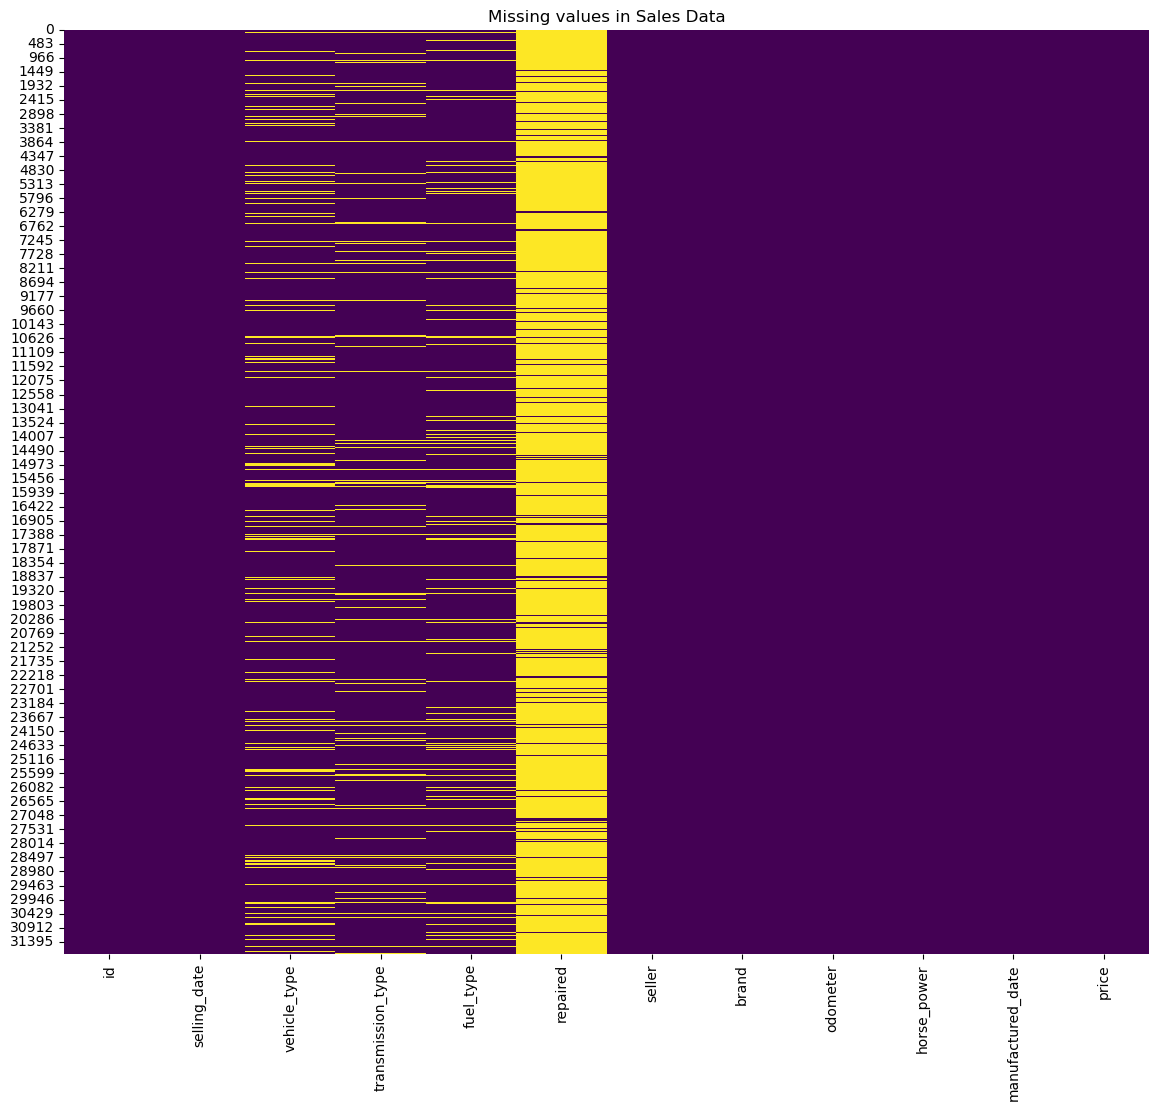

In [11]:
plt.figure(figsize=(14,12))
sns.heatmap(data_sales.isnull(), cbar=False, cmap='viridis')
plt.title('Missing values in Sales Data')
plt.show()

In [26]:
data_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31814 entries, 0 to 31813
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 31814 non-null  int64 
 1   selling_date       31814 non-null  object
 2   vehicle_type       28450 non-null  object
 3   transmission_type  30053 non-null  object
 4   fuel_type          28909 non-null  object
 5   repaired           3077 non-null   object
 6   seller             31814 non-null  int64 
 7   brand              31814 non-null  object
 8   odometer           31814 non-null  object
 9   horse_power        31814 non-null  int64 
 10  manufactured_date  31814 non-null  int64 
 11  price              31814 non-null  object
dtypes: int64(4), object(8)
memory usage: 2.9+ MB


In [17]:
data_sales.head()

,id,selling_date,vehicle_type,transmission_type,fuel_type,repaired,seller,brand,odometer,horse_power,manufactured_date,price
0,1,2011-04-04 13:38:56,sedan,Automatic,gasoline,NaN,397,bmw,"150,000km",286,1992,"96,600,000 Rwf"
1,2,2011-03-12 16:58:10,compact car,Automatic,gasoline,NaN,240,smart,"70,000km",71,2002,"48,420,000 Rwf"
2,3,2011-04-01 14:38:50,station wagon,Manual,gasoline,NaN,226,ford,"150,000km",0,1998,"12,420,000 Rwf"
3,4,2011-03-20 17:55:21,sedan,Manual,gasoline,NaN,111,volkswagen,"150,000km",90,1990,"360,000 Rwf"
4,5,2011-03-16 18:55:19,sedan,Manual,diesel,NaN,861,volkswagen,"150,000km",90,1993,"13,188,000 Rwf"


In [18]:
data_sales.tail()

,id,selling_date,vehicle_type,transmission_type,fuel_type,repaired,seller,brand,odometer,horse_power,manufactured_date,price
31809,31810,2011-03-12 11:50:17,station wagon,Manual,diesel,NaN,483,volkswagen,"150,000km",140,2001,"49,198,800 Rwf"
31810,31811,2011-03-12 10:55:54,station wagon,Manual,gasoline,NaN,253,ford,"125,000km",105,1990,"480,000 Rwf"
31811,31812,2011-03-31 22:48:48,NaN,NaN,NaN,NaN,243,sonstige_autos,"150,000km",0,1995,0 Rwf
31812,31813,2011-04-04 20:46:02,sedan,Automatic,diesel,NaN,32,chrysler,"125,000km",218,2005,"181,080,000 Rwf"
31813,31814,2011-03-28 10:50:25,convertible,Manual,gasoline,NaN,742,opel,"150,000km",75,1991,"13,176,000 Rwf"


In [32]:
data_sales['transmission_type'].value_counts()
# label it

transmission_type
Manual       23311
Automatic     6742
Name: count, dtype: int64

In [20]:
data_sales['vehicle_type'].value_counts().index
# label the data

Index(['sedan', 'compact car', 'station wagon', 'van', 'convertible', 'Other',
       'SUV', 'other'],
      dtype='object', name='vehicle_type')

In [45]:
data_sales['price'].value_counts().index
# removing rwf and , in a price column

Index(['0 Rwf', '600,000 Rwf', '12,600,000 Rwf', '12,000,000 Rwf',
       '24,600,000 Rwf', '12,240,000 Rwf', '720,000 Rwf', '960,000 Rwf',
       '1,198,800 Rwf', '1,080,000 Rwf',
       ...
       '1,141,200 Rwf', '48,334,800 Rwf', '120,585,600 Rwf', '228,238,800 Rwf',
       '36,418,800 Rwf', '168,404,400 Rwf', '1,032,000 Rwf', '37,051,200 Rwf',
       '2,029,198,800 Rwf', '193,194,000 Rwf'],
      dtype='object', name='price', length=1892)

In [22]:
data_sales['fuel_type'].value_counts().index
# All are clear to be transform in dummies except other which we need to check if we delete it or not

Index(['gasoline', 'diesel', 'LPG', 'CNG', 'hybrid', 'other', 'electric'], dtype='object', name='fuel_type')

In [23]:
data_sales['odometer'].value_counts().index
# Removing km and , at the end of number

Index(['150,000km', '125,000km', '100,000km', '90,000km', '80,000km',
       '70,000km', '60,000km', '5,000km', '50,000km', '40,000km', '20,000km',
       '30,000km', '10,000km'],
      dtype='object', name='odometer')

In [35]:
data_sales['repaired'].value_counts()
# replace NaN with No because there is only two values and if the car is repaired of not

repaired
Yes    3077
Name: count, dtype: int64

In [46]:
data_sales['manufactured_date'].value_counts().index
# Old vehicle are the most valuable then thinking what to do with them, remove date which are not a year 

Index([1995, 2000, 1994, 1999, 1998, 1996, 2001, 1997, 1993, 2002, 2003, 2004,
       1992, 2006, 2005, 2012, 1991, 2011, 1990, 2007, 2008, 2009, 1989, 2013,
       1988, 2010, 1985, 1987, 1986, 1984, 1983, 1975, 1980, 1982, 1981, 1979,
       1977, 1978, 1965, 1973, 1966, 1974, 1971, 1967, 1963, 1976, 1968, 1962,
       1955, 1972, 1970, 1969, 1964, 1961, 1960, 1958, 1905, 1959, 1954, 4995,
       9994, 1945, 1936, 1957, 1795, 1950, 2014,  996, 4795, 1924, 1956, 1929,
       1495, 1943, 1926, 1922, 5906, 2795, 1953, 1932, 1933, 1951, 8995, 6195,
       9991, 1946],
      dtype='int64', name='manufactured_date')

<Axes: >

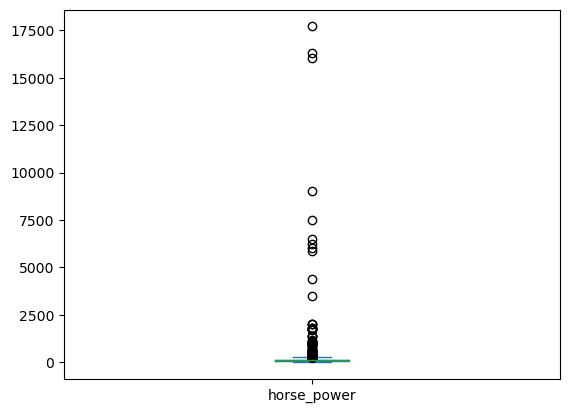

In [30]:
data_sales['horse_power'].plot(kind='box')
# there are car which can not have some horse power so we need to remove them, outliers basicaly, and how caome a car can do 0 km????



In [29]:
data_sales['horse_power'].describe()

count    31814.000000
mean       115.096593
std        205.423145
min          0.000000
25%         69.000000
50%        105.000000
75%        147.000000
max      17700.000000
Name: horse_power, dtype: float64

In [34]:
data_sales['brand'].value_counts().index
# hier all the type of car exist not need of dropping and they are valuable

Index(['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford', 'renault',
       'peugeot', 'fiat', 'seat', 'nissan', 'mazda', 'smart', 'citroen',
       'skoda', 'toyota', 'hyundai', 'sonstige_autos', 'volvo', 'mini',
       'mitsubishi', 'honda', 'kia', 'alfa_romeo', 'porsche', 'chevrolet',
       'suzuki', 'chrysler', 'daihatsu', 'dacia', 'land_rover', 'jeep',
       'jaguar', 'daewoo', 'subaru', 'rover', 'saab', 'lancia', 'trabant',
       'lada'],
      dtype='object', name='brand')

In [38]:
data_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Day          365 non-null    object
 1   Season       365 non-null    object
 2   Month        365 non-null    int64 
 3   Holiday      365 non-null    object
 4   Week Day     365 non-null    int64 
 5   Working Day  365 non-null    object
dtypes: int64(2), object(4)
memory usage: 17.2+ KB


In [47]:
data_sales.head()

,id,selling_date,vehicle_type,transmission_type,fuel_type,repaired,seller,brand,odometer,horse_power,manufactured_date,price
0,1,2011-04-04 13:38:56,sedan,Automatic,gasoline,NaN,397,bmw,"150,000km",286,1992,"96,600,000 Rwf"
1,2,2011-03-12 16:58:10,compact car,Automatic,gasoline,NaN,240,smart,"70,000km",71,2002,"48,420,000 Rwf"
2,3,2011-04-01 14:38:50,station wagon,Manual,gasoline,NaN,226,ford,"150,000km",0,1998,"12,420,000 Rwf"
3,4,2011-03-20 17:55:21,sedan,Manual,gasoline,NaN,111,volkswagen,"150,000km",90,1990,"360,000 Rwf"
4,5,2011-03-16 18:55:19,sedan,Manual,diesel,NaN,861,volkswagen,"150,000km",90,1993,"13,188,000 Rwf"


In [40]:
data_dates.head()

,Day,Season,Month,Holiday,Week Day,Working Day
0,2011-01-01,Winter,1,No,6,No
1,2011-01-02,Winter,1,No,0,No
2,2011-01-03,Winter,1,No,1,Yes
3,2011-01-04,Winter,1,No,2,Yes
4,2011-01-05,Winter,1,No,3,Yes


In [56]:
# print(data_sellers.head())
data_sellers.nunique().sum()


2880

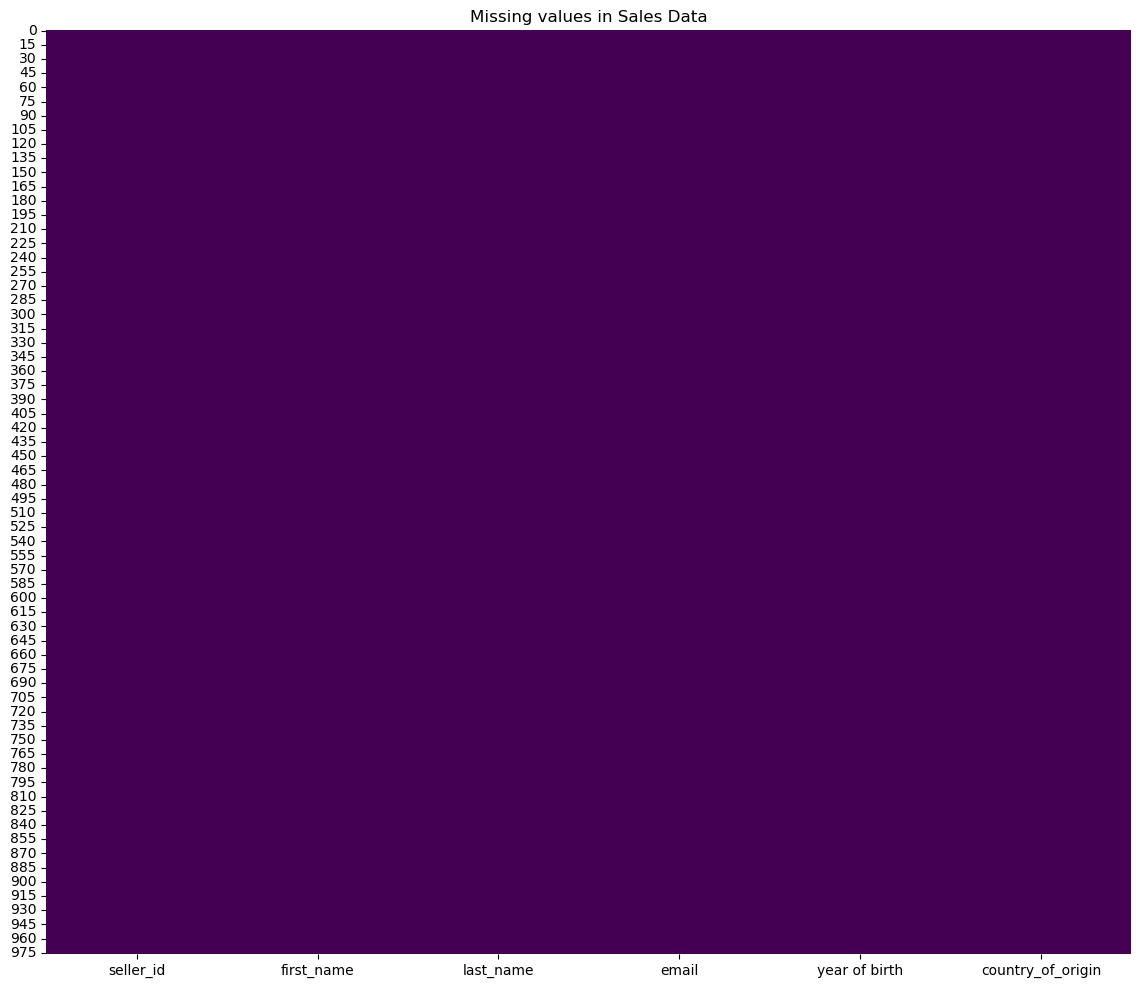

In [57]:
plt.figure(figsize=(14,12))
sns.heatmap(data_sellers.isnull(), cbar=False, cmap='viridis')
plt.title('Missing values in Sales Data')
plt.show()

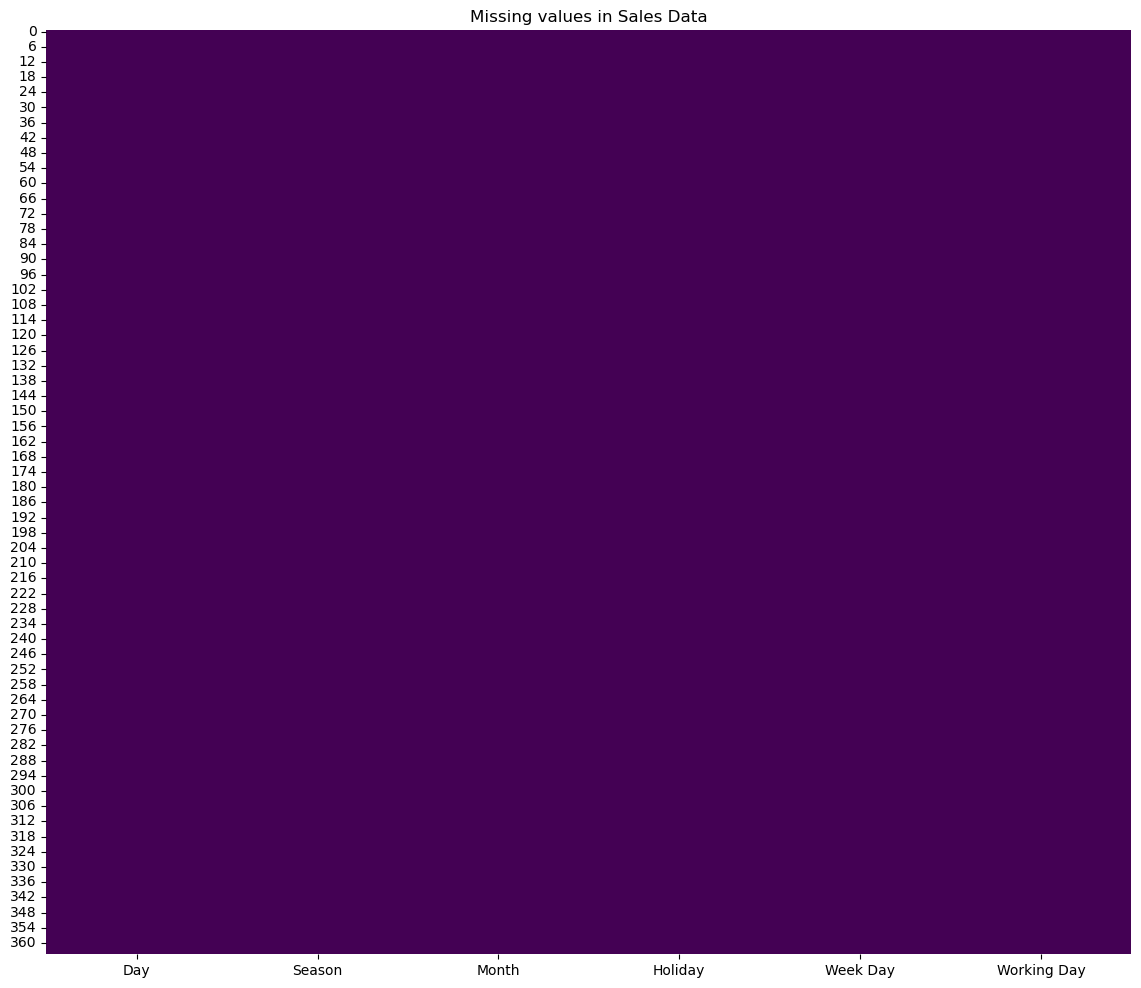

In [58]:
plt.figure(figsize=(14,12))
sns.heatmap(data_dates.isnull(), cbar=False, cmap='viridis')
plt.title('Missing values in Sales Data')
plt.show()